### Expolatory Data Analysis (EDA)

* Project Overview

The project aims to create a self-learning AI Chat-Bot for Moringa School using the Natural Language Toolkit (NLTK). This Chat-Bot is designed to enhance user interaction on the Moringa School website by providing information, answering inquiries, and improving engagement through natural language processing.
* Objectives of the EDA

The primary objective of the EDA is to thoroughly examine the dataset comprising intents, questions, and responses. The analysis aims to understand the distribution and nature of the data, identify patterns, and uncover insights that will guide the development of the AI Chat-Bot. Key areas include understanding the diversity of intents, analyzing the structure and length of questions and responses, and identifying common themes and word frequencies.
* Data Visualization

Data visualization plays a crucial role in this EDA. Various graphical representations will be employed to illustrate the findings. These include bar charts to show intent distribution, histograms for analyzing question and response lengths, and word clouds for visualizing frequent terms. These visual tools will help in making data-driven decisions and in conveying complex data in an accessible format for stakeholders.

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import json
import re
import pandas as pd
import nltk;
from nltk.stem import PorterStemmer
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer;
from nltk.tokenize import word_tokenize;
from nltk.tokenize import RegexpTokenizer;
from nltk.corpus import stopwords;
from nltk.stem import WordNetLemmatizer;
nltk.download('wordnet');
from nltk import bigrams, trigrams, FreqDist;
nltk.download('stopwords');
nltk.download('averaged_perceptron_tagger');
nltk.download('punkt');
from collections import Counter;
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image, display
!pip install wordcloud;
from scipy import stats
import statistics
import matplotlib
import matplotlib.pyplot as plt;

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# loading the data
with open('../Final_Intents.json', 'r') as file:
    intents = json.load(file)

In [3]:
# Function to pair each question with its corresponding response
def pair_questions_responses(data):
    paired_data = []
    for item in data:
        tag = item.get('tag', 'Unknown')
        questions = item.get('questions', [])
        responses = item.get('responses', [])
        
        for question, response in zip(questions, responses):
            paired_data.append({'tag': tag, 'question': question, 'response': response})
    
    return paired_data

In [4]:
# Use the function to pair questions and responses
paired_data = pair_questions_responses(intents)

In [5]:
df = pd.DataFrame(paired_data)
df.head(20)

,tag,question,response
0,Data Science,What does the data science course at Moringa S...,The data science course at Moringa School cove...
1,Data Science,Can you provide details about the curriculum a...,The curriculum and modules in the data science...
2,Data Science,"How long is the data science course, and what ...",The duration of the data science course is fle...
3,Data Science,Tell me about the practical aspects of the dat...,Practical aspects of the data science learning...
4,Data Science,Are there any prerequisites for enrolling in t...,Prerequisites for enrolling in the data scienc...
5,Data Science,What technologies and tools are covered in the...,Technologies and tools covered in the data sci...
6,Data Science,Can you provide information about the instruct...,Instructors in the data science program bring ...
7,Data Science,How does the course incorporate real-world app...,The course incorporates real-world application...
8,Data Science,What projects or assignments are part of the d...,Projects and assignments in the data science c...
9,Data Science,What is the balance between theoretical concep...,The data science program maintains a balance b...


#### Text Preprocessing

In [6]:
# Normalization: Convert text to lowercase
normalized_questions = [question.lower() for intent in intents for question in intent['questions']]
# Display the first few normalized questions
print("Normalized Questions (Sample):", normalized_questions[:5])

Normalized Questions (Sample): ['what does the data science course at moringa school cover?', 'can you provide details about the curriculum and modules in the data science program?', 'how long is the data science course, and what are the scheduling options?', 'tell me about the practical aspects of the data science learning experience.', 'are there any prerequisites for enrolling in the data science course?']


In [7]:
# Removing punctuation and special characters
cleaned_questions = [re.sub(r'[^\w\s]', '', question) for question in normalized_questions]
print("Cleaned Questions (Sample):", cleaned_questions[:5])

Cleaned Questions (Sample): ['what does the data science course at moringa school cover', 'can you provide details about the curriculum and modules in the data science program', 'how long is the data science course and what are the scheduling options', 'tell me about the practical aspects of the data science learning experience', 'are there any prerequisites for enrolling in the data science course']


In [8]:
# Tokenization: Break text into words
tokenized_questions = [question.split() for question in cleaned_questions]
# Display the first few tokenized questions
print("Tokenized Questions (Sample):", tokenized_questions[:5])

Tokenized Questions (Sample): [['what', 'does', 'the', 'data', 'science', 'course', 'at', 'moringa', 'school', 'cover'], ['can', 'you', 'provide', 'details', 'about', 'the', 'curriculum', 'and', 'modules', 'in', 'the', 'data', 'science', 'program'], ['how', 'long', 'is', 'the', 'data', 'science', 'course', 'and', 'what', 'are', 'the', 'scheduling', 'options'], ['tell', 'me', 'about', 'the', 'practical', 'aspects', 'of', 'the', 'data', 'science', 'learning', 'experience'], ['are', 'there', 'any', 'prerequisites', 'for', 'enrolling', 'in', 'the', 'data', 'science', 'course']]


In [9]:
# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_words = [[word for word in question if word not in stop_words] for question in tokenized_questions]
# Display the first few sets of filtered words
print("Filtered Words (Sample):", filtered_words[:5])


Filtered Words (Sample): [['data', 'science', 'course', 'moringa', 'school', 'cover'], ['provide', 'details', 'curriculum', 'modules', 'data', 'science', 'program'], ['long', 'data', 'science', 'course', 'scheduling', 'options'], ['tell', 'practical', 'aspects', 'data', 'science', 'learning', 'experience'], ['prerequisites', 'enrolling', 'data', 'science', 'course']]


In [10]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [[lemmatizer.lemmatize(word) for word in question] for question in filtered_words]

print("Lemmatized Words (Sample):", lemmatized_words[:5])

Lemmatized Words (Sample): [['data', 'science', 'course', 'moringa', 'school', 'cover'], ['provide', 'detail', 'curriculum', 'module', 'data', 'science', 'program'], ['long', 'data', 'science', 'course', 'scheduling', 'option'], ['tell', 'practical', 'aspect', 'data', 'science', 'learning', 'experience'], ['prerequisite', 'enrolling', 'data', 'science', 'course']]


## EDA
#### Intent distribution
We analyze the frequency of different intents. This can help use understand which topics are more common and might require more training data or refined responses.


In [11]:
# Statistics for the intents
intent_counts = {intent['tag']: len(intent['questions']) for intent in intents}

# Calculate additional statistics
mean_questions_per_intent = sum(intent_counts.values()) / len(intent_counts)
median_questions_per_intent = sorted(intent_counts.values())[len(intent_counts) // 2]
total_intents = len(intent_counts)

# Find the intent(s) with the fewest questions
min_questions_count = min(intent_counts.values())
intents_with_fewest_questions = [intent for intent, count in intent_counts.items() if count == min_questions_count]

# Print the calculated statistics
print(f"Total Intents: {total_intents}")
print(f"Mean Questions per Intent: {mean_questions_per_intent:.2f}")
print(f"Median Questions per Intent: {median_questions_per_intent}")
print(f"Intent(s) with Fewest Questions ({min_questions_count} questions): {', '.join(intents_with_fewest_questions)}")

Total Intents: 10
Mean Questions per Intent: 52.40
Median Questions per Intent: 30
Intent(s) with Fewest Questions (10 questions): Contacts


* Findings;
* In the dataset, there are a total of 10 unique intents, each representing a specific category or topic.
* On average, each intent contains approximately 52.40 questions. This statistic provides insight into the typical number of questions associated with each intent.
* The median number of questions per intent is 30. This means that half of the intents have 30 or fewer questions, while the other half contains more than 30 questions. The median helps us understand the central tendency of question counts.
* The intent "Contacts" stands out as having the fewest questions among all intents, with a total of 10 questions. This intent represents a category with relatively fewer questions compared to others in the dataset.







##### Visualizing The Intents by Number of Questions

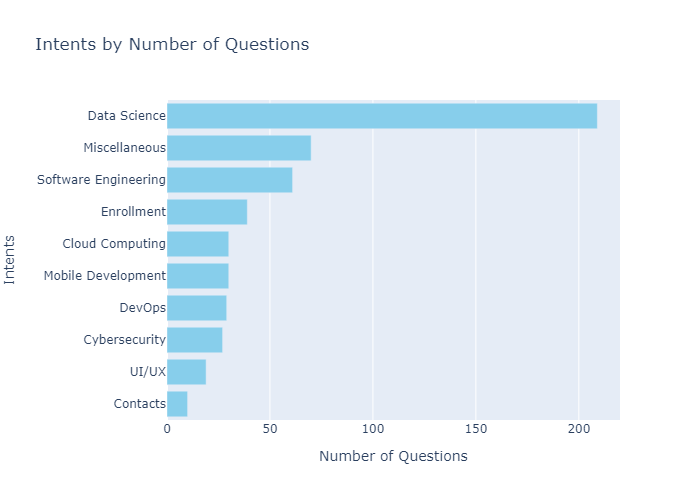

In [12]:
# Sort the intents by the number of questions
sorted_intents = sorted(intent_counts.items(), key=lambda item: item[1], reverse=True)

# Unpack the intents for plotting
tags, counts = zip(*sorted_intents)

# Create the bar chart
fig = go.Figure()

# Add trace for bar chart
fig.add_trace(go.Bar(
    y=tags, 
    x=counts, 
    orientation='h',  # Horizontal bar chart
    marker_color='skyblue'  # Assign a single color to all bars
))

# Update layout for the chart
fig.update_layout(
    title='Intents by Number of Questions',
    xaxis_title='Number of Questions',
    yaxis_title='Intents',
    yaxis=dict(autorange="reversed")  # This will order the y-axis in descending order
)

# Save the figure as an image (PNG, for example)
image_path = "intents_bar_chart.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))

Data science has the most questions and responses followed by miscellaneous tags. Contacts tag has the least number of questions and answers

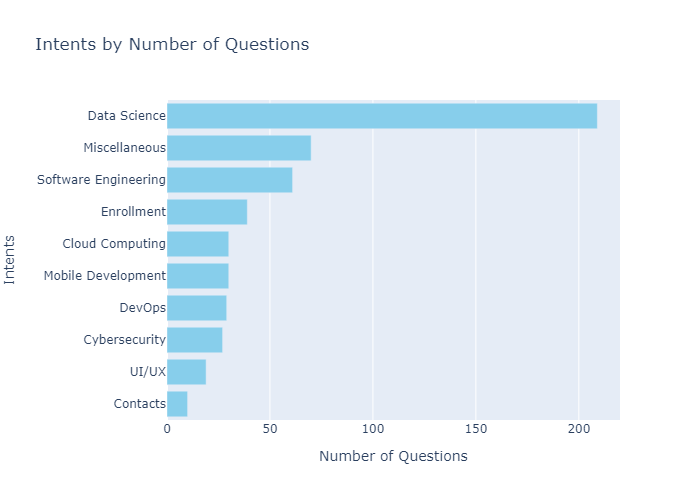

In [23]:
# Sort the intents by the number of questions
sorted_intents = sorted(intent_counts.items(), key=lambda item: item[1], reverse=True)

# Unpack the intents for plotting
tags, counts = zip(*sorted_intents)

# Assign a single color to all intents
color = 'skyblue'

# Create the bar chart
fig = go.Figure()

# Add trace for bar chart
fig.add_trace(go.Bar(
    y=tags, 
    x=counts, 
    orientation='h',  # Horizontal bar chart
    marker_color=color  # Assign the same color to all bars
))

# Update layout for the chart
fig.update_layout(
    title='Intents by Number of Questions',
    xaxis_title='Number of Questions',
    yaxis_title='Intents',
    yaxis=dict(autorange="reversed")  # This will order the y-axis in descending order
)

# Save the figure as an image (PNG, for example)
image_path = "intents_bar_chart.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))



###  Question and Response Length Analysis

In [14]:
# Calculate the lengths of questions in all intents
question_lengths = [len(question.split()) for intent in intents for question in intent['questions']]
response_lengths = [len(response.split()) for intent in intents for response in intent.get('responses', [])]
# Calculate the mean, median, and standard deviation for question lengths
question_mean = statistics.mean(question_lengths)
question_median = statistics.median(question_lengths)
question_std_dev = statistics.stdev(question_lengths)

# Calculate the mean, median, and standard deviation for response lengths
response_mean = statistics.mean(response_lengths)
response_median = statistics.median(response_lengths)
response_std_dev = statistics.stdev(response_lengths)

# Print the statistics
print("Statistics for Question Lengths:")
print(f"Mean: {question_mean}")
print(f"Median: {question_median}")
print(f"Standard Deviation: {question_std_dev}")
print("\n")
print("Statistics for Response Lengths:")
print(f"Mean: {response_mean}")
print(f"Median: {response_median}")
print(f"Standard Deviation: {response_std_dev}")

Statistics for Question Lengths:
Mean: 10.57824427480916
Median: 10.0
Standard Deviation: 2.8364575383040656


Statistics for Response Lengths:
Mean: 20.63953488372093
Median: 19.0
Standard Deviation: 11.063712529204555


Questions: The statistics for question lengths show that, on average, questions are relatively short (around 10 words), with a moderate level of variability.
Responses: In contrast, responses are longer on average (around 21 words), with greater variability in their lengths.

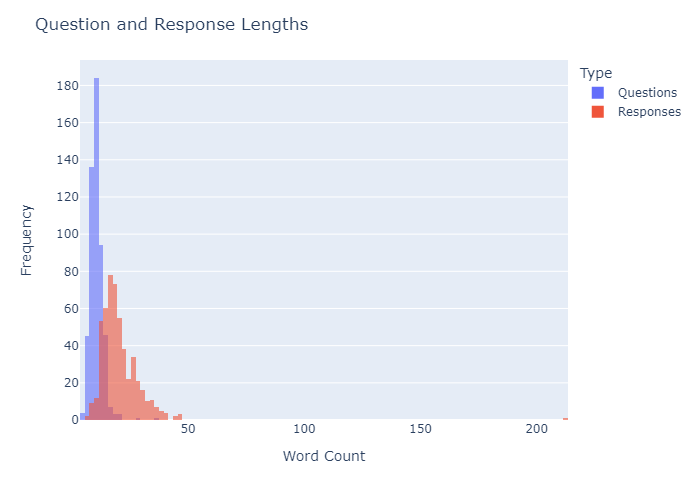

In [15]:
# Displaying the length of questions and responses
# Displaying the length of questions and responses
question_lengths = [len(question.split()) for intent in intents for question in intent['questions']]
response_lengths = [len(response.split()) for intent in intents for response in intent.get('responses', [])]

# Create a histogram using Plotly Express
fig = px.histogram(
    x=question_lengths + response_lengths, 
    color=["Questions"] * len(question_lengths) + ["Responses"] * len(response_lengths),
    barmode='overlay',
    opacity=0.6
)

# Update layout for the chart
fig.update_layout(
    title="Question and Response Lengths",
    xaxis_title="Word Count",
    yaxis_title="Frequency",
    legend_title="Type"
)

# Save the figure as an image (PNG, for example)
image_path = "question_response_lengths_histogram.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))

* This graph is a histogram that compares the lengths of questions and responses. 
* The blue bars (questions) are clustered more towards the left side of the graph, indicating that most questions are shorter in length. The tallest blue bar, indicating the highest frequency, falls in the range of 0-10 words approximately.
* The red bars (responses) show a wider distribution across the word count, suggesting that responses have a more varied length. The tallest red bar seems to be in the range of 10-20 words approximately.
* The blue bars (questions) have a peak frequency much higher than the red bars (responses), suggesting that there is a common word count range where most questions fall.
* Overall, the histogram suggests that questions tend to be concise, while responses are generally longer and more varied in length. 

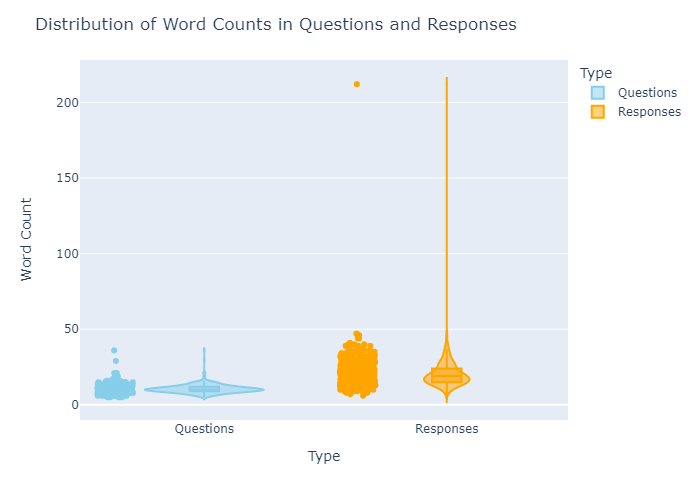

In [16]:
# Create a DataFrame with word counts and types (Questions or Responses)
data = {
    "Word Count": question_lengths + response_lengths,
    "Type": ["Questions"] * len(question_lengths) + ["Responses"] * len(response_lengths),
}

# Create the violin plot using Plotly Express
fig = px.violin(
    data_frame=data,
    x="Type",
    y="Word Count",
    color="Type",  # Specify color based on the 'Type' column
    box=True,  # Display box plot inside the violin
    points="all",  # Show all points
    color_discrete_map={"Questions": "skyblue", "Responses": "orange"},  # Define colors
)

# Update layout for the chart
fig.update_layout(
    title="Distribution of Word Counts in Questions and Responses",
)

# Save the figure 
image_path = "word_counts_distribution_violin_plot.png"
fig.write_image(image_path)
display(Image(filename=image_path))

The graph is a violin plot showing the distribution of word counts in questions and responses. Questions typically have fewer words, while responses vary more in length, with some being quite lengthy.

### Word Frequency Analysis
** Identify the most common words

In [17]:
# Calculating word frequency
all_words = [word for question in lemmatized_words for word in question]  # Flatten the list
word_freq = Counter(all_words)

# Display the most common words
print("Most Common Words:", word_freq.most_common(20))

Most Common Words: [('course', 212), ('data', 150), ('science', 128), ('moringa', 91), ('school', 88), ('student', 54), ('mobile', 39), ('project', 33), ('program', 32), ('provide', 30), ('development', 29), ('software', 28), ('curriculum', 27), ('available', 27), ('skill', 26), ('engineering', 26), ('cybersecurity', 26), ('learning', 25), ('career', 25), ('opportunity', 25)]


* findings;
* The analysis provides insights into the key themes and topics present in the dataset.
* The most common words reflect a strong emphasis on courses, data science, Moringa, and educational aspects.
* With 'course' being the most frequent word, the dataset places a substantial emphasis on educational offerings.
* 'data,' 'science,' and 'moringa' indicate a strong focus on data science education, aligning with industry and institutional themes.
* The repetition of terms like 'student,' 'develop,' and 'learn' underscores a learner-centric approach in the dataset.
* Understanding these frequently occurring words is valuable for gaining insights into the main subjects and focus areas of the dataset.

#### Visualizing Most Common Words

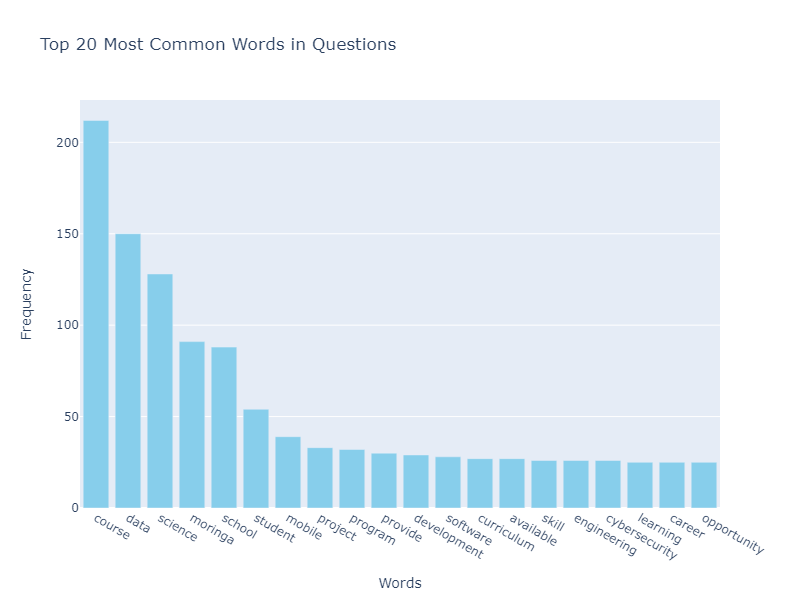

In [18]:
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=words,
    y=frequencies,
    title="Top 20 Most Common Words in Questions",
    labels={'x': 'Words', 'y': 'Frequency'},
    color_discrete_sequence=['skyblue']
)

# Update layout for the chart (adjusting size)
fig.update_layout(
    width=800,  # Set the width of the chart
    height=600,  # Set the height of the chart
)

# Save the figure as an image (PNG, for example)
image_path = "most_common_words_bar_chart.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))

### Word Cloud for Most Common Words

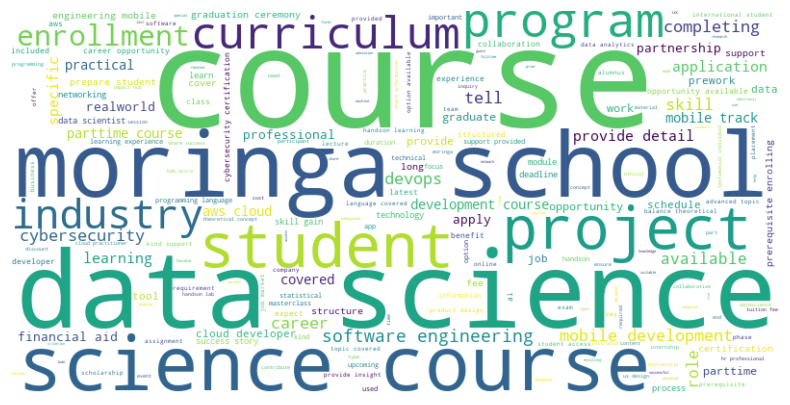

In [19]:
# Creating a word cloud for visualizing the most frequent words.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
all_words_string = ' '.join([word for sublist in lemmatized_words for word in sublist])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_words_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bi-grams and Tri-grams Analysis
Analyze the most common bi-grams and tri-grams.

In [20]:
# Create bi-grams and tri-grams
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Frequency distribution
bi_gram_freq = FreqDist(bi_grams)
tri_gram_freq = FreqDist(tri_grams)

# Display most common bi-grams and tri-grams
print("Most Common Bi-grams:", bi_gram_freq.most_common(10))
print("Most Common Tri-grams:", tri_gram_freq.most_common(10))

Most Common Bi-grams: [(('data', 'science'), 127), (('moringa', 'school'), 87), (('science', 'course'), 58), (('software', 'engineering'), 23), (('mobile', 'development'), 20), (('course', 'moringa'), 16), (('provide', 'detail'), 14), (('mobile', 'track'), 13), (('parttime', 'course'), 13), (('aws', 'cloud'), 13)]
Most Common Tri-grams: [(('data', 'science', 'course'), 58), (('course', 'moringa', 'school'), 15), (('aws', 'cloud', 'course'), 10), (('software', 'engineering', 'mobile'), 9), (('engineering', 'mobile', 'track'), 9), (('data', 'science', 'program'), 8), (('mobile', 'development', 'course'), 8), (('career', 'opportunity', 'available'), 7), (('moringa', 'school', 'provide'), 7), (('science', 'course', 'data'), 6)]


* Findings
* The most common bi-gram is 'data science' with a frequency of 127, indicating a strong association between these two words.
* 'Moringa school' is also highly frequent, suggesting a focus on education or programs related to Moringa School.
* In tri-grams, 'data science course' is the most common, reinforcing the emphasis on data science education.
* 'Moringa school' appears in both bi-grams and tri-grams, indicating its relevance and prominence in the dataset.
* Other terms like 'mobile development,' 'software engineering,' and 'financial aid' also stand out in the most common n-grams.





#### Visualizing the N-grams

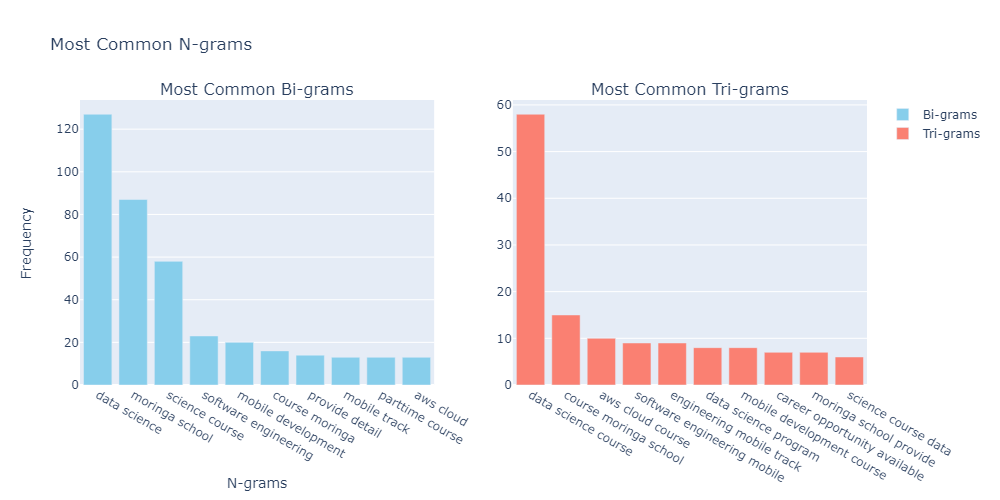

In [21]:
from plotly.subplots import make_subplots
bi_gram_labels, bi_gram_counts = zip(*bi_gram_freq.most_common(10))
tri_gram_labels, tri_gram_counts = zip(*tri_gram_freq.most_common(10))
bi_gram_labels_str = [' '.join(gram) for gram in bi_gram_labels]
tri_gram_labels_str = [' '.join(gram) for gram in tri_gram_labels]

# Initialize subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Most Common Bi-grams", "Most Common Tri-grams"))

# Add bi-gram bar chart
fig.add_trace(
    go.Bar(x=bi_gram_labels_str, y=bi_gram_counts, name="Bi-grams"),
    row=1, col=1
)

# Add tri-gram bar chart
fig.add_trace(
    go.Bar(x=tri_gram_labels_str, y=tri_gram_counts, name="Tri-grams"),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Most Common N-grams",
    xaxis_title="N-grams",
    yaxis_title="Frequency",
    colorway=["skyblue", "salmon"], 
    width=1000,  # Set the width of the chart
    height=500,  # Set the height of the chart
)

# Save the figure as an image 
image_path = "most_common_ngrams_subplot.png"
fig.write_image(image_path)

# Display the image directly in the notebook
display(Image(filename=image_path))

* The graph shows two bar charts side by side, representing the most common bi-grams and tri-grams from a dataset. 
* On the left, the bi-grams bar chart shows that "data science" is the most frequent bi-gram, followed by "moringa school" and others. 
* On the right, the tri-grams bar chart indicates "data science course" as the most frequent tri-gram, with a notable drop in frequency for subsequent tri-grams. 
* The y-axes represent the frequency of occurrences, and the x-axes list the bi-grams and tri-grams.
* The blue bars for bi-grams and the red bars for tri-grams allow for an easy comparison of their respective frequencies.